In [1]:
import os  #importing os library
import pandas as pd  #importing pandas library
import numpy as np  #importing numpy library
import matplotlib.pyplot as plt  #importing matplotlib library 

%matplotlib inline

# Data Preparation

## 1. Merging data from each month into one CSV and reading in updated dataframe

In [2]:
os.chdir('D:\Islington\Coursework\Year 2\Smart Data Discovery\CW1\Sales Analysis\CSV')  
#changing to the directory that contains .csv files

In [3]:
os.getcwd()  #checking if the current directory has changed

'D:\\Islington\\Coursework\\Year 2\\Smart Data Discovery\\CW1\\Sales Analysis\\CSV'

In [4]:
df = pd.DataFrame()  #defining an empty dataframe 

# Merging data from each .csv file into one
for each in os.listdir():
    if each.endswith('.csv'):
        A = pd.read_csv(each)
        df = df.append(A)

In [5]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353.0,AAA Batteries (4-pack),3.0,2.99,9/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354.0,iPhone,1.0,700.00,9/1/2019 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355.0,iPhone,1.0,700.00,9/23/2019 7:39,"220 12th St, San Francisco, CA 94016"
11684,259356.0,34in Ultrawide Monitor,1.0,379.99,9/19/2019 17:30,"511 Forest St, San Francisco, CA 94016"


#

## 2. Removing the NaN missing values from the updated dataframe

In [6]:
df.dropna(inplace = True)  #removing all the NaN missing values from the updated dataframe

In [7]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,4/19/2019 8:46,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,4/7/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,4/12/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,4/30/2019 9:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353.0,AAA Batteries (4-pack),3.0,2.99,9/17/2019 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354.0,iPhone,1.0,700.00,9/1/2019 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355.0,iPhone,1.0,700.00,9/23/2019 7:39,"220 12th St, San Francisco, CA 94016"
11684,259356.0,34in Ultrawide Monitor,1.0,379.99,9/19/2019 17:30,"511 Forest St, San Francisco, CA 94016"


#

## 3. Converting Quantity Ordered and Price Each to numeric

In [8]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])  #Converting Quantity Ordered column to numeric datatype
df['Price Each'] = pd.to_numeric(df['Price Each'])  #converting Price Each column to numeric datatype

In [9]:
df.dtypes  #displaying the datatype of each column

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

#

## 4. Creating a new column named Month from Ordered Date of updated dataframe and converting it to integer as data type 

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])  #converting Ordered Date column to datetime format

In [11]:
df['Month'] = df['Order Date'].dt.month_name()  ##creating new column named Month from only the month name of Ordered date 

In [12]:
df["Month"] = df["Order Date"].dt.month.astype(int)  #converting the datatype of Month column to integer

In [13]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
11681,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
11682,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
11683,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
11684,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


#

## 5. Creating a new column named City from Purchase Address based on the value in updated dataframe

In [14]:
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])

In [15]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles
...,...,...,...,...,...,...,...,...
11681,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles
11682,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco
11683,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,San Francisco
11684,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,San Francisco


#

# Data Analysis

## 1. Showing summary statistics of sum, mean, standard deviation, skewness, and kurtosis of any chosen variable. 

### Sum:

In [16]:
df['Price Each'].sum()  #Calculating the sum of 'Price Each' column

34289130.67999999

### Mean:

In [17]:
df['Price Each'].mean()  #Calculating the mean of 'Price Each' column

184.3997347670135

### Standard Deviation:

In [18]:
df['Price Each'].std()  #Calculating the standard deviation of 'Price Each' column

332.7313298840936

### Skewness:

In [19]:
df['Price Each'].skew()  #Calculating the skewness of 'Price Each' column

2.8721487292935257

### Kurtosis:

In [20]:
df['Price Each'].kurtosis()  #Calculating the Kurtosis of 'Price Each' column

9.094568341148197

#

## 2. Calculating and showing the correlation between all the variables.

In [21]:
df.corr()  #Calculating the correlation of all the variables

,Order ID,Quantity Ordered,Price Each,Month
Order ID,1.000000,0.000702,-0.002857,0.993063
Quantity Ordered,0.000702,1.000000,-0.148272,0.000791
Price Each,-0.002857,-0.148272,1.000000,-0.003375
Month,0.993063,0.000791,-0.003375,1.000000


#

# Data Exploration

## Which Month has the best sales? and how much was the earning in that month? Show with a bar graph.

In [22]:
df['Total Price'] = df['Quantity Ordered']*df['Price Each']  
#Creating a new column 'Total Price' which calculates the product of 'Quantity Ordered' and 'Price Each' columns

In [23]:
monthly_sales = df.groupby(['Month'])['Total Price'].sum()
best_sales_month = monthly_sales.idxmax()
best_sales_month

12

##### Ans. The 12th month has the best sales.

######

In [24]:
monthly_sales.max()

4613443.34

##### Ans. The total earnings in the 12th month was 4613443.34.

######

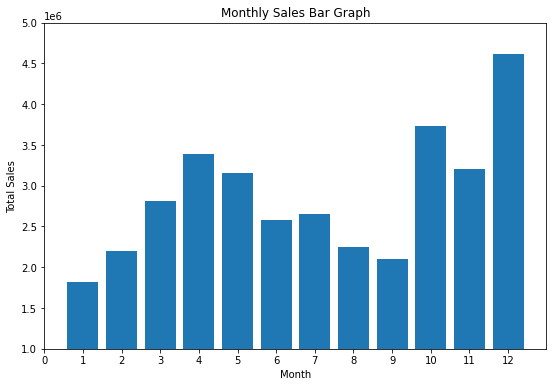

In [25]:
plt.figure(figsize=(9, 6))
plt.bar(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Bar Graph')
plt.xticks(np.arange(13))
plt.ylim((1000000,5000000))
plt.show()

#

## Which city has sold the highest product?

In [26]:
city_product_quantity = df.groupby(['City'])['Quantity Ordered'].sum()
hightest_product_sold = city_product_quantity.idxmax()
hightest_product_sold

' San Francisco'

##### San Francisco sold the highest number of products.

#

## Which product was sold the most in overall? Illustrate it through bar graph.

In [27]:
product_ordered_quantity = df.groupby(['Product'])['Quantity Ordered'].sum()
most_sold_product = product_ordered_quantity.idxmax()
most_sold_product

'AAA Batteries (4-pack)'

##### Ans. AAA Batteries (4-pack) was sold the most in overall.

######

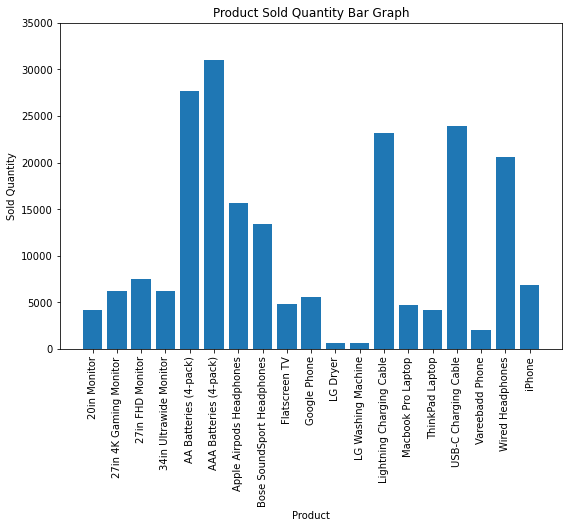

In [28]:
plt.figure(figsize=(9, 6))
plt.bar(product_ordered_quantity.index, product_ordered_quantity.values)
plt.xlabel('Product')
plt.ylabel('Sold Quantity')
plt.title('Product Sold Quantity Bar Graph')
plt.xticks(rotation = 90)
plt.ylim((0,35000))
plt.show()

#

## Write a Python program to show histogram plot of any chosen variables. Use proper labels in the graph.

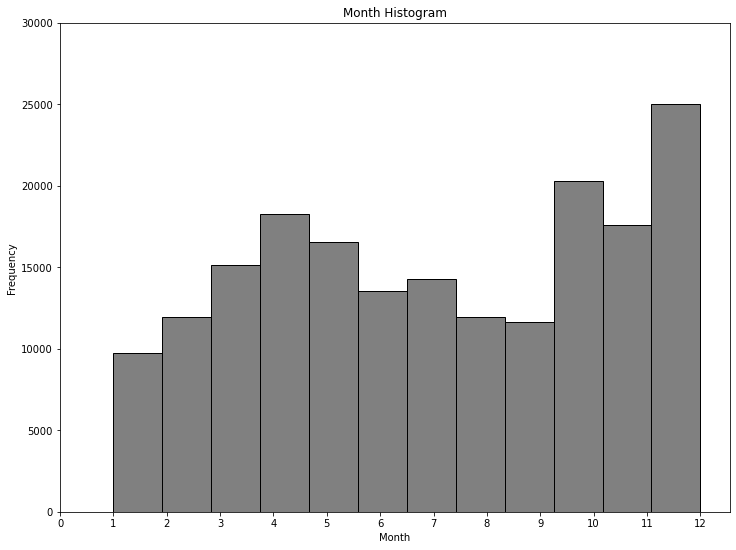

In [30]:
plt.figure(figsize=(12, 9))
plt.hist(df['Month'], bins=12, color='grey', edgecolor='black')
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.title("Month Histogram")
plt.ylim(0,30000)
plt.xticks(np.arange(13))
plt.show()